In [1]:
import pandas as pd
import os

from src.inference import *

## Inference Data

Must be in the form of a Pandas Dataframe where the first three columns are X, Y, Z

In [2]:
data = '../bootstrapping/data/Data_SHTs_Triton/20240131/163528/data.dat'
df = pd.read_table(data, sep='\s+')
print(df)

          RB      LB           Idc  VSDe      ST    P
0     -900.0 -960.00  1.370518e-11   0.1 -2000.0  0.0
1     -900.0 -960.25  2.078716e-11   0.1 -2000.0  0.0
2     -900.0 -960.50  1.023857e-11   0.1 -2000.0  0.0
3     -900.0 -960.75  5.554474e-12   0.1 -2000.0  0.0
4     -900.0 -961.00  1.963989e-11   0.1 -2000.0  0.0
...      ...     ...           ...   ...     ...  ...
31995 -999.5 -998.75  6.481653e-12   0.1 -2000.0  0.0
31996 -999.5 -999.00  2.391021e-11   0.1 -2000.0  0.0
31997 -999.5 -999.25  6.093311e-12   0.1 -2000.0  0.0
31998 -999.5 -999.50  2.347163e-11   0.1 -2000.0  0.0
31999 -999.5 -999.75  9.788782e-12   0.1 -2000.0  0.0

[32000 rows x 6 columns]


## Set-Up Model

/Users/andrijapaurevic/miniforge3/envs/detectron2/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[1, 1] ['ND', 'LD', 'CD', 'RD', 'DD']


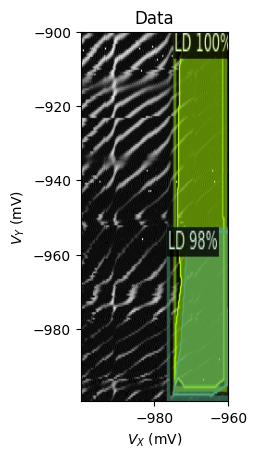

In [3]:
# Load trained model path
model_path = os.path.join("../models/dot_num", "model_0009999.pth")  # path to the model we just trained
config_path = "src/config.yaml"

model_name = 'dot_num'

outputs, metadata, image = inference(df,
                                    model_path,
                                    config_path,
                                    model_name='dot_num',
                                    processor='cpu',
                                    polygon_threshold=3,
                                    confidence_threshold=0.95,
                                    plot_predictions=True
                                    )

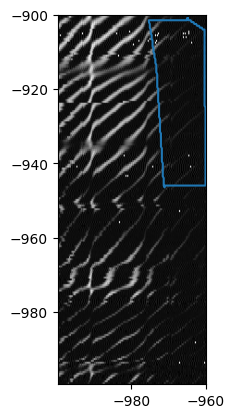

In [4]:
test_mask = outputs['instances'][outputs['instances'].pred_classes==1].pred_masks[1]

test_mask_polygon_units = pixel_mask_to_polygon_units(test_mask,df,plot=True)